# 데이터 로드

In [1]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

# 데이터 로드

In [5]:
# 엑셀 로우데이터를 유니코드 텍스트로 저장(utf-16)
total_data = pd.read_table('mobile_app_review.txt', encoding='utf-16')

In [10]:
total_data[:5]
len(total_data)

927

In [8]:
# 평점으로 라벨링하기(4,5점=1, 1,2점=0)
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,document,label
0,1,아니 sc제일은행 들어갈라면 이거깔아야된다해서 깔앗는데 알약쓰는뎁쇼?????????...,0
1,4,음악 어플리케이션 중 가장 좋다. ux측면에서도 뛰어나고 이용자가 많아 음악 차트의...,1
2,4,"다양한 자료의 공유 및, 폴더 별 정리 등 업무나 연구에 있어서 파일 정리가 필요한...",1
3,5,"실시간 통장 잔고 확인, 계좌이체 등 여러가지 은행 업무를 수행할 수 있어서 좋다....",1
4,5,대한민국 안에서는 구글 지도보다도 훨씬 편리하다. 도착지 계산 및 교통수단 자동검색...,1


In [7]:
 # shuffling
total_data = total_data.sample(frac=1).reset_index(drop=True) 
total_data[:5]

,ratings,document
0,1,아니 sc제일은행 들어갈라면 이거깔아야된다해서 깔앗는데 알약쓰는뎁쇼?????????...
1,4,음악 어플리케이션 중 가장 좋다. ux측면에서도 뛰어나고 이용자가 많아 음악 차트의...
2,4,"다양한 자료의 공유 및, 폴더 별 정리 등 업무나 연구에 있어서 파일 정리가 필요한..."
3,5,"실시간 통장 잔고 확인, 계좌이체 등 여러가지 은행 업무를 수행할 수 있어서 좋다...."
4,5,대한민국 안에서는 구글 지도보다도 훨씬 편리하다. 도착지 계산 및 교통수단 자동검색...


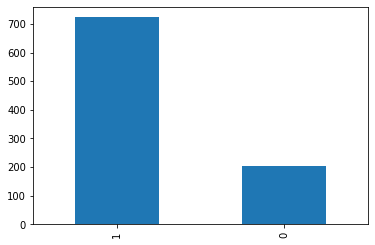

In [11]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')

In [12]:
# 정확하게 개수를 체크
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    204
1      1    723


# 데이터 정규화

In [13]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
total_data['document'] = total_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data[:5]

,ratings,document,label
0,1,아니 제일은행 들어갈라면 이거깔아야된다해서 깔앗는데 알약쓰는뎁쇼,0
1,4,음악 어플리케이션 중 가장 좋다 측면에서도 뛰어나고 이용자가 많아 음악 차트의 정확...,1
2,4,다양한 자료의 공유 및 폴더 별 정리 등 업무나 연구에 있어서 파일 정리가 필요한 ...,1
3,5,실시간 통장 잔고 확인 계좌이체 등 여러가지 은행 업무를 수행할 수 있어서 좋다 불...,1
4,5,대한민국 안에서는 구글 지도보다도 훨씬 편리하다 도착지 계산 및 교통수단 자동검색 ...,1


In [14]:
# 공백만 남은 데이터를 넓값으로 바꾸고 개수를 체크하자
total_data['document'] = total_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
total_data['document'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())

ratings     0
document    0
label       0
dtype: int64


# 정제&정규화한 데이터 파일로 저장

In [15]:
total_data.to_csv('mobile_app_review_data.txt', index=False, sep='\t', encoding='utf-8')